기계학습과 응용 기말고사 프로젝트 - 수학과 2019131031 곽민준

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.4751 - loss: 1.4806 - val_accuracy: 0.9034 - val_loss: 0.3233
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.7422 - loss: 0.7713 - val_accuracy: 0.9455 - val_loss: 0.1744
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.7979 - loss: 0.6154 - val_accuracy: 0.9532 - val_loss: 0.1519
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8377 - loss: 0.5078 - val_accuracy: 0.9585 - val_loss: 0.1305
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8609 - loss: 0.4423 - val_accuracy: 0.9699 - val_loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9635 - loss: 0.1120
Test Accuracy: 0.9699000120162964


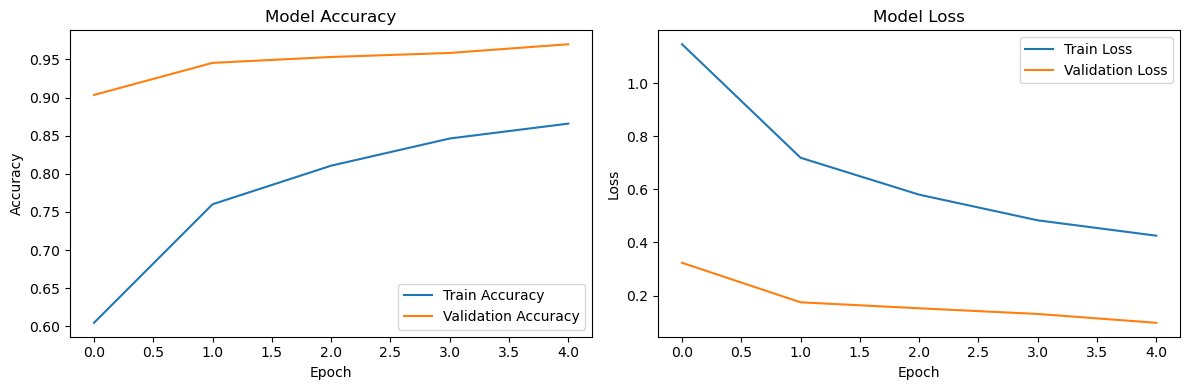

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=20,    # 이미지 회전 (0~20도)
    width_shift_range=0.2,  # 수평 이동
    height_shift_range=0.2, # 수직 이동
    shear_range=0.2,      # 기울이기
    zoom_range=0.2,       # 확대/축소
    horizontal_flip=True,  # 좌우 반전
    fill_mode='nearest'    # 변형된 이미지의 빈 부분을 가장 가까운 값으로 채움
)

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # 드롭아웃을 추가하여 과적합 방지
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습을 위한 데이터 증강 적용
datagen.fit(x_train)

# 학습
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    epochs=5, 
                    validation_data=(x_test, y_test))

# 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


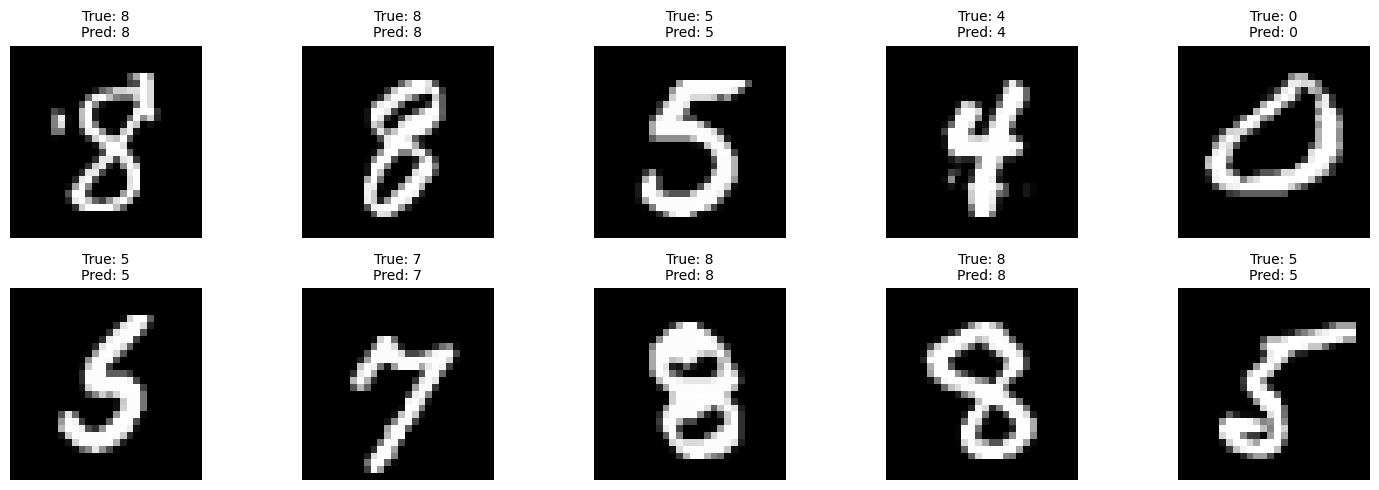

In [5]:
import numpy as np

# 테스트 데이터에서 샘플 가져오기
num_samples = 10  # 시각화할 샘플 개수
indices = np.random.choice(len(x_test), num_samples, replace=False)  # 랜덤 인덱스
sample_images = x_test[indices]
sample_labels = y_test[indices]

# 모델 예측
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# 시각화
plt.figure(figsize=(15, 5))
for i, (image, true_label, predicted_label) in enumerate(zip(sample_images, sample_labels, predicted_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap="gray")  # 이미지 시각화
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()